1. Опишите, какие действия вы бы выполнили с этими наборами данных, чтобы их можно было использовать для обучения моделей?
2. В данных файлах единицы в поле StuckPipe означают близость к аварии (при этом они отмечают как аварию, так и несколько секунд до и после нее).
Видно, что в данном поле есть переизбыток данных одного типа и недостаток другого.
Как повлияет данная ситуация на точность прогноза моделей? 
Чтобы вы сделали, чтобы повысить точность? Приведите пример кода.
3. Как вы бы прогнозировали на основе этих данных вероятность аварии в следующую минуту? 5 минут? час?

Немного о себе:
    Афанасьев Василий.
    Прохожу обучение на Аналитика Данных и ML в SkillFactory (классические методы). ML: никогда не применял и никаких проектов еще не делал. Не имею какой-то хорошей математической подготовки в матане и линале, обладаю только хорошими знаниями основ математической статистики. Другими словами, я понимаю как работают те или иные методы, что за подходы используются в методах ML, но вот описать их математическими формулами не смогу. Понимаю, что каждый метод обладает определенными свойствами и метриками, благодаря которым можно сделать оценку успешности - соответственно если будет использован тот или иной метод, то найду эти метрики и смогу объяснить, но изначально "на зубок" их не знаю.

### Важно!
Далее будет ответ на задание и вообще о подходе к задаче, но после этого вы можете посмотреть некоторое беглое исследование одного из представленных датасетов, в котором я частично затронул разные этапы.

Для более точного прогноза рекомендуется учитывать следующие моменты:
- Следует разрабатывать прогнозную систему и проводить исследование с учетом типа аварии, т.к. для разных типов аварий могут быть разные зависимости.
- Также следует учитывать модель и производителя оборудования вышки (не датчиков).
- Следует добавить данные о проведении периодичности обслуживания, учета участия человека в момент совершения аварии или незадолго до нее, срок службы оборудования, кол-во аварий каждого типа или вообще всех.
Для решения данной задачи я рекомендую использовать ансамблевые методы ML, а точнее стекинг по следующим причинам:
- Это позволит оценивать внутри "слабых учеников" разные признаки и/или их комбинации подходящим методом: какие-то признаки представляют собой временной ряд (отклонение от прогнозов временного ряда), какие-то признаки можно более точно использовать путем линейной регрессии (увеличение вероятности аварийности от срока службы оборудования) и т.п.
- Данный метод не будет требовать сильных вычислительных мощностей (в отличии от нейросетей), что позволит устанавливать оборудование непосредственно в местонахождении вышек, позволяя убрать зависимость от стабильного канала связи, и позволит снизить стоимость владения.
- Простота реализации и высокие показатели эффективности метода.
### 1.
Стандартно необходимо обработать данные на пропуски, проверить тип данных, возможно провести нормализацию и/или стандартизацию(зависит от выбранного метода ML), возможно перевести некоторые переменные в номинативные (зависит от выбранного метода ML) и т.д.
Потребуется изучение каждого признака - что он означает, какие возможные значения может принимать, т.е. необходимо погрузиться в предметную область.
В зависимости от используемого метода в "слабых учениках" и способа оценки может потребовать чистка данных от выбросов, а в некоторых методах сами выбросы (аномалии) и могут послужить причиной возникновения аварии. Для поиска выбросов нужно руководствоваться здравым смыслом (мало ли какие ошибки могут быть в данных, например далее в анализе я заметил отклонение времени от ожидаемого), статистикой или методом кластеризации (вроде DBSCAN)
Также необходимо будет приступить к созданию новых признаков (Feature Engineering): ручное создание, полиномальные признаки, создание DUMMY-переменных, статистики по признакам и т.п.
### 2.
Данная ситуация сильно скажется на точности - будет ниже. Что я сделал бы - постарался бы выделить момент аварии среди подобных данных, таким образом можно будет с некоторой точностью можно разделить данные на штатную работу, предаварийную ситуацию, аварию, послеаварийную ситуацию. Сравнение признаков в этим все виды  работы позволит получить определенные паттерны поведения.
### 3.
Для данного вида прогноза я постарался бы определить какие признаки и с какой вероятностью отклоняются от ожидаемых значений перед аварией. Отобрал бы эти признаки на категории: 1 - все признаки, которые влияют на возникновение аварии; 2 - которые влияют на возникновение аварии обычно за 5 минут и позднее; 3 - которые влияют обычно за час и позднее.



In [110]:
import pandas as pd
import math
df1 = pd.read_excel('216-1.xlsx', usecols='A:W')

In [138]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         73 non-null     object 
 1   StuckPipe         73 non-null     float64
 2   DEPT              73 non-null     float64
 3   BPOS              73 non-null     float64
 4   HKLD              73 non-null     float64
 5   STOR              73 non-null     float64
 6   FLWI              73 non-null     float64
 7   RPM               73 non-null     float64
 8   SPPA              73 non-null     float64
 9   ECD               73 non-null     float64
 10  GR                73 non-null     float64
 11  APRS              73 non-null     float64
 12  BVEL              73 non-null     float64
 13  RIG_STATE         73 non-null     float64
 14  Stick_Slip_Ratio  73 non-null     float64
 15  StickPercentage   73 non-null     float64
 16  ESD               73 non-null     float64
dtyp

In [112]:
df1.head()

,Date/Time,StuckPipe,TVD,DEPT,CDEPTH,HDTH,BPOS,HKLD,STOR,FLWI,...,DLS,INCL,AZIM,GR,APRS,BVEL,RIG_STATE,Stick_Slip_Ratio,StickPercentage,ESD
0,date,bool,m,m,m,m,m,kkgf,kft.lbf,L/min,...,deg/30m,deg,deg,gAPI,bar,m/h,,,%,sg
1,2012-12-13 10:00:00,NaN,-999.25,4634.1001,-999.25,5669.0664,31.4797,57.5518,1.92,0,...,-999.25,-999.25,-999.25,-999.25,-999.25,0,12,-999.25,-999.25,-999.25
2,2012-12-13 10:00:30,NaN,-999.25,4634.1670,-999.25,5669.0664,31.4096,13.0272,0,0,...,-999.25,-999.25,-999.25,-999.25,-999.25,0,2,-999.25,-999.25,-999.25
3,2012-12-13 10:01:00,NaN,-999.25,4634.1670,-999.25,5669.0664,31.4096,13.3991,0,0,...,-999.25,-999.25,-999.25,-999.25,-999.25,0,2,-999.25,-999.25,-999.25
4,2012-12-13 10:01:30,NaN,-999.25,4634.1670,-999.25,5669.0664,31.4096,11.1947,0.02,0,...,-999.25,-999.25,-999.25,-999.25,-999.25,0,2,-999.25,-999.25,-999.25


In [113]:
# В первой строке содержатся данные по единицам измерения каждого показателя (признака).
# Сохраним эти данные в отдельный датафрейм, а из нужного уберем данную строку.
df1_info = df1[:1]
df1 = df1[1:].reset_index(drop=True)
# Как видно выше, в колонке StuckPipe не всего данные заполнены, обозначим их как 0, что будет обозначать
# нормальный режим работы.
df1['StuckPipe'].fillna('0', inplace=True)
df1.head()

,Date/Time,StuckPipe,TVD,DEPT,CDEPTH,HDTH,BPOS,HKLD,STOR,FLWI,...,DLS,INCL,AZIM,GR,APRS,BVEL,RIG_STATE,Stick_Slip_Ratio,StickPercentage,ESD
0,2012-12-13 10:00:00,0,-999.25,4634.1001,-999.25,5669.0664,31.4797,57.5518,1.92,0,...,-999.25,-999.25,-999.25,-999.25,-999.25,0,12,-999.25,-999.25,-999.25
1,2012-12-13 10:00:30,0,-999.25,4634.1670,-999.25,5669.0664,31.4096,13.0272,0,0,...,-999.25,-999.25,-999.25,-999.25,-999.25,0,2,-999.25,-999.25,-999.25
2,2012-12-13 10:01:00,0,-999.25,4634.1670,-999.25,5669.0664,31.4096,13.3991,0,0,...,-999.25,-999.25,-999.25,-999.25,-999.25,0,2,-999.25,-999.25,-999.25
3,2012-12-13 10:01:30,0,-999.25,4634.1670,-999.25,5669.0664,31.4096,11.1947,0.02,0,...,-999.25,-999.25,-999.25,-999.25,-999.25,0,2,-999.25,-999.25,-999.25
4,2012-12-13 10:02:00,0,-999.25,4634.1670,-999.25,5669.0664,31.4188,12.1744,-0.01,0,...,-999.25,-999.25,-999.25,-999.25,-999.25,0,2,-999.25,-999.25,-999.25


In [114]:
df1_info

,Date/Time,StuckPipe,TVD,DEPT,CDEPTH,HDTH,BPOS,HKLD,STOR,FLWI,...,DLS,INCL,AZIM,GR,APRS,BVEL,RIG_STATE,Stick_Slip_Ratio,StickPercentage,ESD
0,date,bool,m,m,m,m,m,kkgf,kft.lbf,L/min,...,deg/30m,deg,deg,gAPI,bar,m/h,,,%,sg


In [115]:
# Первая колонка должна иметь тип данных Date/Time.
df1['Date/Time'] = pd.to_datetime(df1['Date/Time'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         73 non-null     datetime64[ns]
 1   StuckPipe         73 non-null     object        
 2   TVD               73 non-null     object        
 3   DEPT              73 non-null     object        
 4   CDEPTH            73 non-null     object        
 5   HDTH              73 non-null     object        
 6   BPOS              73 non-null     object        
 7   HKLD              73 non-null     object        
 8   STOR              73 non-null     object        
 9   FLWI              73 non-null     object        
 10  RPM               73 non-null     object        
 11  SPPA              73 non-null     object        
 12  ECD               73 non-null     object        
 13  DLS               73 non-null     object        
 14  INCL              73 non-nul

In [116]:
# Остальные float
df1.iloc[:,1:] = df1.iloc[:,1:].astype('float64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         73 non-null     datetime64[ns]
 1   StuckPipe         73 non-null     float64       
 2   TVD               73 non-null     float64       
 3   DEPT              73 non-null     float64       
 4   CDEPTH            73 non-null     float64       
 5   HDTH              73 non-null     float64       
 6   BPOS              73 non-null     float64       
 7   HKLD              73 non-null     float64       
 8   STOR              73 non-null     float64       
 9   FLWI              73 non-null     float64       
 10  RPM               73 non-null     float64       
 11  SPPA              73 non-null     float64       
 12  ECD               73 non-null     float64       
 13  DLS               73 non-null     float64       
 14  INCL              73 non-nul

In [117]:
# Посмотрим на данные, которые отмечены якобы аварией.
df1[df1['StuckPipe']==1]

,Date/Time,StuckPipe,TVD,DEPT,CDEPTH,HDTH,BPOS,HKLD,STOR,FLWI,...,DLS,INCL,AZIM,GR,APRS,BVEL,RIG_STATE,Stick_Slip_Ratio,StickPercentage,ESD
68,2012-12-13 10:34:00,1.0,-999.25,4579.2236,-999.25,5669.0664,30.6202,56.6129,23.73,1800.3419,...,-999.25,-999.25,-999.25,89.53,-999.2500,-372.8070,7.0,-999.250,-999.250,-999.25
69,2012-12-13 10:34:30,1.0,-999.25,4577.8125,-999.25,5669.0664,31.7602,46.3299,20.19,1801.1747,...,-999.25,-999.25,-999.25,-999.25,-999.2500,223.2812,7.0,49.416,49.416,-999.25
70,2012-12-13 10:35:00,1.0,-999.25,4578.2422,-999.25,5669.0664,31.4157,46.0442,13.33,1795.5344,...,-999.25,-999.25,-999.25,-999.25,233.5944,0.0000,4.0,-999.250,-999.250,-999.25
71,2012-12-13 10:35:00,1.0,-999.25,4578.2422,-999.25,5669.0664,31.4157,50.7434,5.50,1794.4746,...,-999.25,-999.25,-999.25,-999.25,-999.2500,0.0000,12.0,-999.250,-999.250,-999.25
72,2012-12-13 10:36:00,1.0,-999.25,4578.2422,-999.25,5669.0664,31.4157,54.8348,2.61,0.0000,...,-999.25,-999.25,-999.25,-999.25,-999.2500,0.0000,12.0,-999.250,-999.250,-999.25


Здесь можно заметить, что нарушена временная хронология в строке 71. Очевидно тут должно быть "10:35:30".
Далее я поправлю это значение. Но есть важный момент - на самом деле, это может быть одним из признаков аварии, но использовать этот признак я бы не рекомендовал, т.к. временные метки устанавливаются программным обеспечением, которое снимает показания, а не "независимым" датчиком, т.е. это больше похоже на ошибку в ПО, а ошибку эту могут в дальнейшем поправить.

In [118]:
df1.loc[71,'Date/Time']='2012-12-13 10:35:30'

In [119]:
df1.describe()

,StuckPipe,TVD,DEPT,CDEPTH,HDTH,BPOS,HKLD,STOR,FLWI,RPM,...,DLS,INCL,AZIM,GR,APRS,BVEL,RIG_STATE,Stick_Slip_Ratio,StickPercentage,ESD
count,73.000000,73.00,73.000000,73.00,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,...,73.00,73.00,73.00,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.068493,-999.25,4614.242338,-999.25,5.669066e+03,18.442989,39.468508,8.991370,928.087611,38.552329,...,-999.25,-999.25,-999.25,-494.590137,-847.995021,-64.848914,6.082192,-670.815956,-882.923775,-971.838047
std,0.254338,0.00,17.681589,0.00,6.410522e-12,12.350538,21.526983,10.359747,872.142669,48.952465,...,0.00,0.00,0.00,544.312661,406.139077,208.456734,3.914905,1943.121189,334.242024,164.455856
min,0.000000,-999.25,4577.812500,-999.25,5.669066e+03,3.240000,11.194700,-0.080000,0.000000,-12.980000,...,-999.25,-999.25,-999.25,-999.250000,-999.250000,-372.807000,2.000000,-999.250000,-999.250000,-999.250000
25%,0.000000,-999.25,4605.958000,-999.25,5.669066e+03,3.709400,14.646500,-0.040000,0.000000,0.290000,...,-999.25,-999.25,-999.25,-999.250000,-999.250000,-324.636400,2.000000,-999.250000,-999.250000,-999.250000
50%,0.000000,-999.25,4606.293000,-999.25,5.669066e+03,18.998200,50.339700,1.360000,1292.226100,0.370000,...,-999.25,-999.25,-999.25,-999.250000,-999.250000,0.000000,7.000000,-999.250000,-999.250000,-999.250000
75%,0.000000,-999.25,4633.907700,-999.25,5.669066e+03,31.345600,55.515200,20.990000,1811.395400,100.170000,...,-999.25,-999.25,-999.25,87.150000,-999.250000,0.000000,7.000000,-999.250000,-999.250000,-999.250000
max,1.000000,-999.25,4634.167000,-999.25,5.669066e+03,32.202100,70.783100,25.640000,1850.536500,102.040000,...,-999.25,-999.25,-999.25,99.150000,233.594400,740.810300,14.000000,15483.870800,144.613900,1.286900


Здесь видно, что некоторые признаки по имеющимся данным не изменяются вообще - стандартное отклонение равно 0. Уберём эти признаки совсем.

In [120]:
lst = []
for i in df1.iloc[:,1:].columns:
    if df1[i].std() == 0:
        lst.append(i)
df1 = df1.drop(columns=lst)
df1.describe()

,StuckPipe,DEPT,HDTH,BPOS,HKLD,STOR,FLWI,RPM,SPPA,ECD,GR,APRS,BVEL,RIG_STATE,Stick_Slip_Ratio,StickPercentage,ESD
count,73.000000,73.000000,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.068493,4614.242338,5.669066e+03,18.442989,39.468508,8.991370,928.087611,38.552329,115.243214,-875.864959,-494.590137,-847.995021,-64.848914,6.082192,-670.815956,-882.923775,-971.838047
std,0.254338,17.681589,6.410522e-12,12.350538,21.526983,10.359747,872.142669,48.952465,104.343491,331.303805,544.312661,406.139077,208.456734,3.914905,1943.121189,334.242024,164.455856
min,0.000000,4577.812500,5.669066e+03,3.240000,11.194700,-0.080000,0.000000,-12.980000,1.427900,-999.250000,-999.250000,-999.250000,-372.807000,2.000000,-999.250000,-999.250000,-999.250000
25%,0.000000,4605.958000,5.669066e+03,3.709400,14.646500,-0.040000,0.000000,0.290000,4.108600,-999.250000,-999.250000,-999.250000,-324.636400,2.000000,-999.250000,-999.250000,-999.250000
50%,0.000000,4606.293000,5.669066e+03,18.998200,50.339700,1.360000,1292.226100,0.370000,85.845200,-999.250000,-999.250000,-999.250000,0.000000,7.000000,-999.250000,-999.250000,-999.250000
75%,0.000000,4633.907700,5.669066e+03,31.345600,55.515200,20.990000,1811.395400,100.170000,227.177400,-999.250000,87.150000,-999.250000,0.000000,7.000000,-999.250000,-999.250000,-999.250000
max,1.000000,4634.167000,5.669066e+03,32.202100,70.783100,25.640000,1850.536500,102.040000,231.509400,1.580500,99.150000,233.594400,740.810300,14.000000,15483.870800,144.613900,1.286900


In [121]:
df1.iloc[:,1:].var()

StuckPipe           6.468798e-02
DEPT                3.126386e+02
HDTH                4.109479e-23
BPOS                1.525358e+02
HKLD                4.634110e+02
STOR                1.073244e+02
FLWI                7.606328e+05
RPM                 2.396344e+03
SPPA                1.088756e+04
ECD                 1.097622e+05
GR                  2.962763e+05
APRS                1.649489e+05
BVEL                4.345421e+04
RIG_STATE           1.532648e+01
Stick_Slip_Ratio    3.775720e+06
StickPercentage     1.117177e+05
ESD                 2.704573e+04
dtype: float64

Если посмотреть на дисперсию, то признак "HDTH" имеет около нулевые значения, также у этого признака стандартное отклонение очень мало. Считаю целесообразным тоже вычеркнуть данный параметр.

In [122]:
df1.drop(columns='HDTH', inplace=True)

In [123]:
df1.head()

,Date/Time,StuckPipe,DEPT,BPOS,HKLD,STOR,FLWI,RPM,SPPA,ECD,GR,APRS,BVEL,RIG_STATE,Stick_Slip_Ratio,StickPercentage,ESD
0,2012-12-13 10:00:00,0.0,4634.1001,31.4797,57.5518,1.92,0.0,-1.07,60.1471,-999.25,-999.25,-999.25,0.0,12.0,-999.25,-999.25,-999.25
1,2012-12-13 10:00:30,0.0,4634.1670,31.4096,13.0272,0.00,0.0,0.28,23.5104,-999.25,-999.25,-999.25,0.0,2.0,-999.25,-999.25,-999.25
2,2012-12-13 10:01:00,0.0,4634.1670,31.4096,13.3991,0.00,0.0,0.28,21.4310,-999.25,-999.25,-999.25,0.0,2.0,-999.25,-999.25,-999.25
3,2012-12-13 10:01:30,0.0,4634.1670,31.4096,11.1947,0.02,0.0,0.24,19.2598,-999.25,-999.25,-999.25,0.0,2.0,-999.25,-999.25,-999.25
4,2012-12-13 10:02:00,0.0,4634.1670,31.4188,12.1744,-0.01,0.0,0.37,15.5608,-999.25,-999.25,-999.25,0.0,2.0,-999.25,-999.25,-999.25


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

Взглянем на графики корреляции между переменными, выделив на них данные в моменты аварий.
Буду смотреть корреляции только части признаков, т.к. у нас тестовое задание, а не реальная работа.

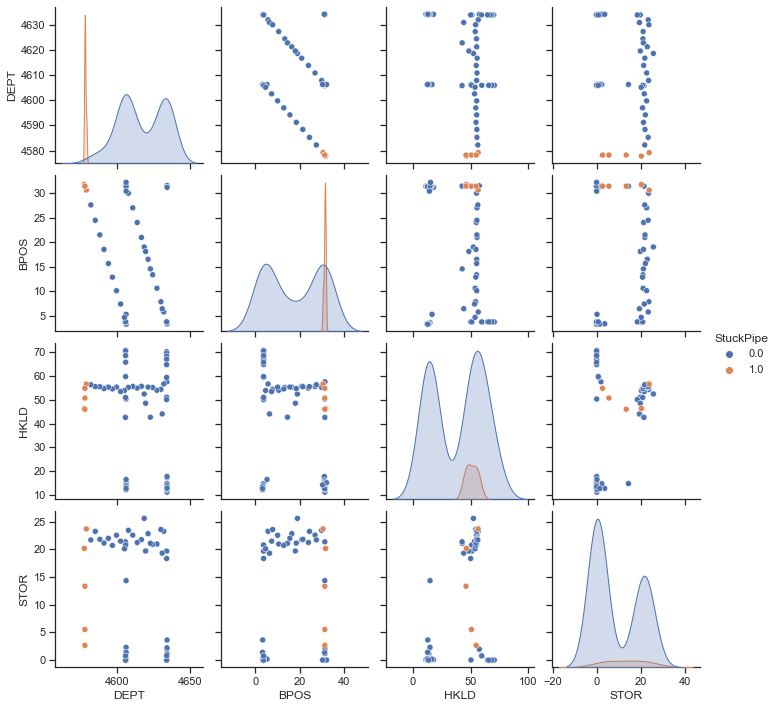

In [125]:
sns.set_theme(style="ticks")
sns.pairplot(df1.iloc[:,1:6], hue="StuckPipe")

Даже при просмотре корреляции части признаков видны те, которые имеют явные отклонения в моменты аварии (StuckPipe = 1). Например: признаки DEPT и BPOS имеют отклонение показателя от ожидаемого распределения, а точечная диаграмма зависимости переменных DEPT и STOR указывает на возможную взаимосвязь значений во время аварии.

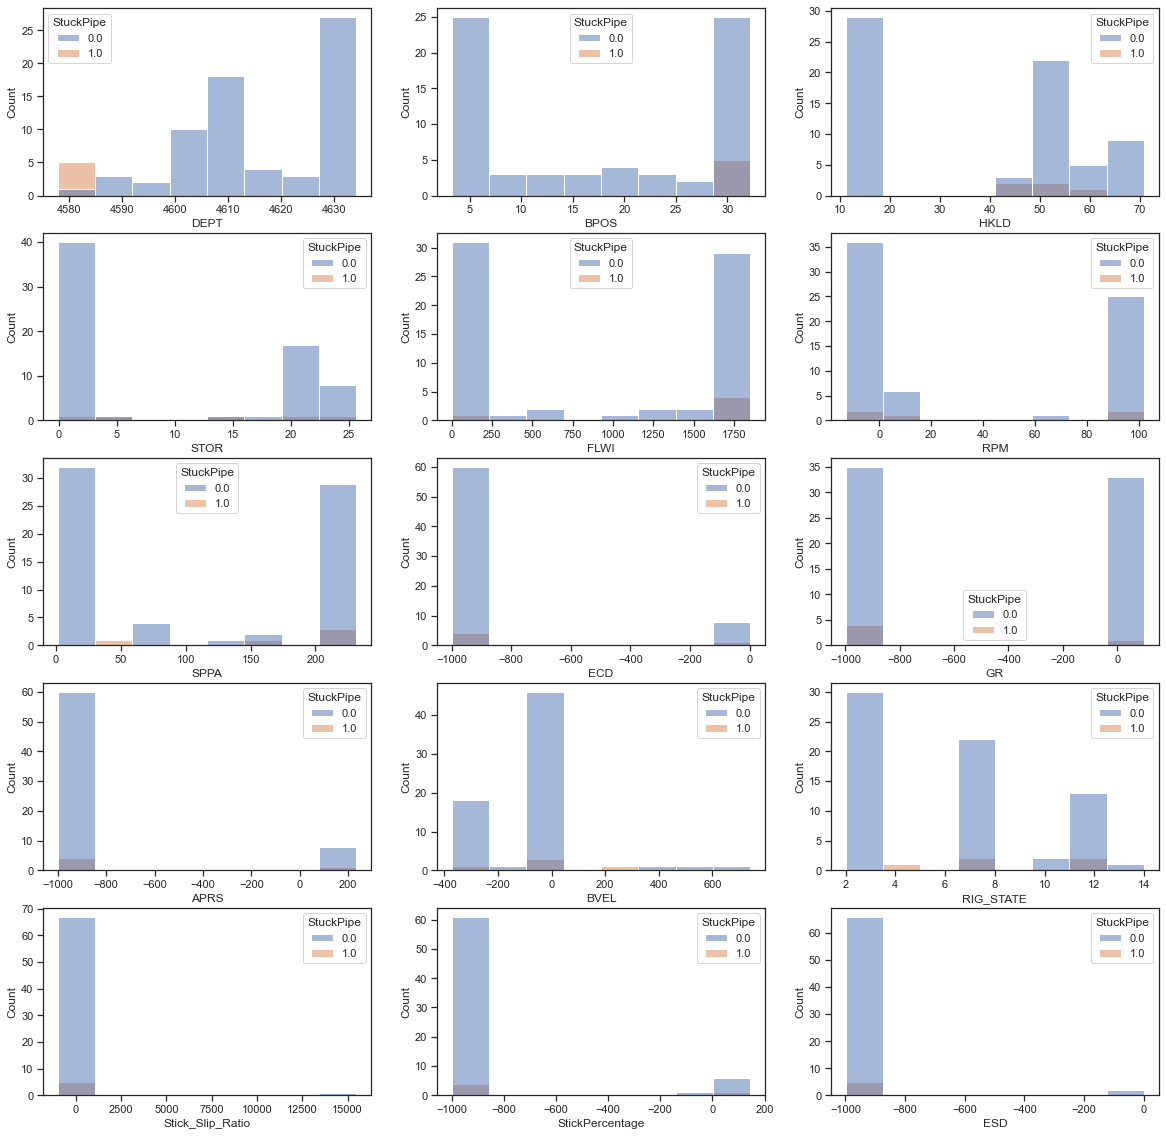

In [126]:
# Посмотрим на гистограмму распределения данных в признаках, также с разделение данных на аварийные.
columns = 3
rows = math.ceil(df1.iloc[:,2:].shape[1]/columns)
fig, ax = plt.subplots(rows, columns, figsize=(20, 20))

i = 0
for col in df1.columns[2:]:
    sns.histplot(x=col, data=df1, hue='StuckPipe', ax=ax[i // columns, i % columns])
    i += 1       

Тут можно выделить несколько моментов:
1. DEPT - имеет выраженные отклонения во время аварии.
2. SPPA и RIG_STATE - имеют одно значение, которое явно выделяется. Судя по названию RIG_STATE - это статус вышки, скорее всего это момент аварии, возможно SPPA означает тоже самое.

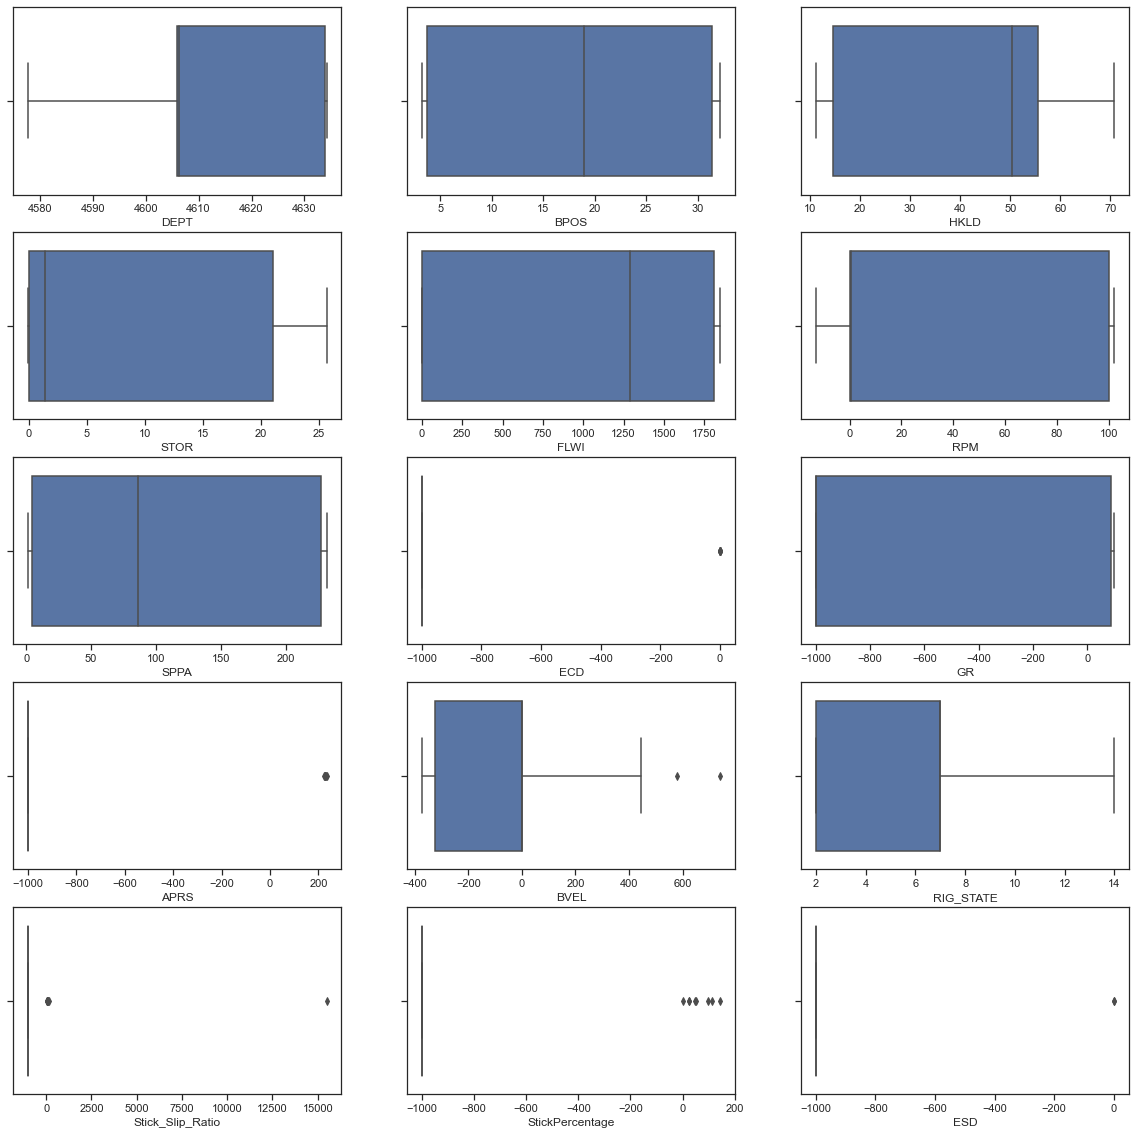

In [127]:
# Посмотрим на boxplot.
columns = 3
rows = math.ceil(df1.iloc[:,2:].shape[1]/columns)
fig, ax = plt.subplots(rows, columns, figsize=(20, 20))

i = 0
for col in df1.columns[2:]:
    sns.boxplot(x=col, data=df1, ax=ax[i // columns, i % columns])
    i += 1 

По ряду признаков данные имеют выбросы, что может указывать на наступление аварии - одна из гипотез.

In [128]:
# Еще раз посмотрим на данные в момент аварии.
df1[df1['StuckPipe'] != 0]

,Date/Time,StuckPipe,DEPT,BPOS,HKLD,STOR,FLWI,RPM,SPPA,ECD,GR,APRS,BVEL,RIG_STATE,Stick_Slip_Ratio,StickPercentage,ESD
68,2012-12-13 10:34:00,1.0,4579.2236,30.6202,56.6129,23.73,1800.3419,100.14,225.7992,-999.2500,89.53,-999.2500,-372.8070,7.0,-999.250,-999.250,-999.25
69,2012-12-13 10:34:30,1.0,4577.8125,31.7602,46.3299,20.19,1801.1747,100.17,226.0288,-999.2500,-999.25,-999.2500,223.2812,7.0,49.416,49.416,-999.25
70,2012-12-13 10:35:00,1.0,4578.2422,31.4157,46.0442,13.33,1795.5344,3.18,229.3665,1.5805,-999.25,233.5944,0.0000,4.0,-999.250,-999.250,-999.25
71,2012-12-13 10:35:30,1.0,4578.2422,31.4157,50.7434,5.50,1794.4746,-1.22,150.2368,-999.2500,-999.25,-999.2500,0.0000,12.0,-999.250,-999.250,-999.25
72,2012-12-13 10:36:00,1.0,4578.2422,31.4157,54.8348,2.61,0.0000,-1.12,37.4144,-999.2500,-999.25,-999.2500,0.0000,12.0,-999.250,-999.250,-999.25


Тут важно заметить про признак RIG_STATE, в строке 70 он имеет значение 4, учитывая когда мы выше корректировали время в строке 71, то скорее всего это как раз момент аварии. Допустим это так, тогда я отмечу момент аварии как StuckPipe = 3, а последующие данные послеаварийными. Получится так: 0 - штатная работа, 1 - предаварийная ситуация, 2 - послеаварийная работа, 3 - авария.

In [129]:
df1.loc[70,'StuckPipe'] = 3.0
df1.loc[71:,'StuckPipe'] = 2.0

<AxesSubplot:xlabel='SPPA', ylabel='Count'>

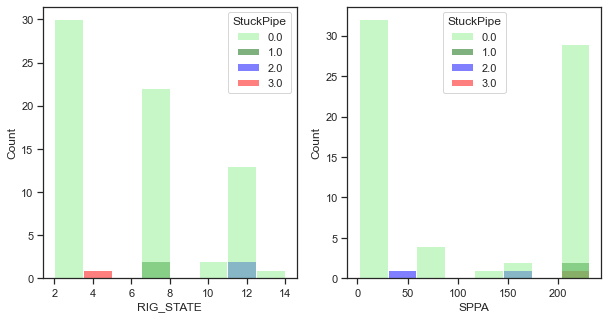

In [130]:
# Еще раз посмотрим на гистограммы с подобными метками:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(x='RIG_STATE', data=df1, hue='StuckPipe', palette=['lightgreen','darkgreen','blue','red'], ax=ax[0])
sns.histplot(x='SPPA', data=df1, hue='StuckPipe', palette=['lightgreen','darkgreen','blue','red'], ax=ax[1])

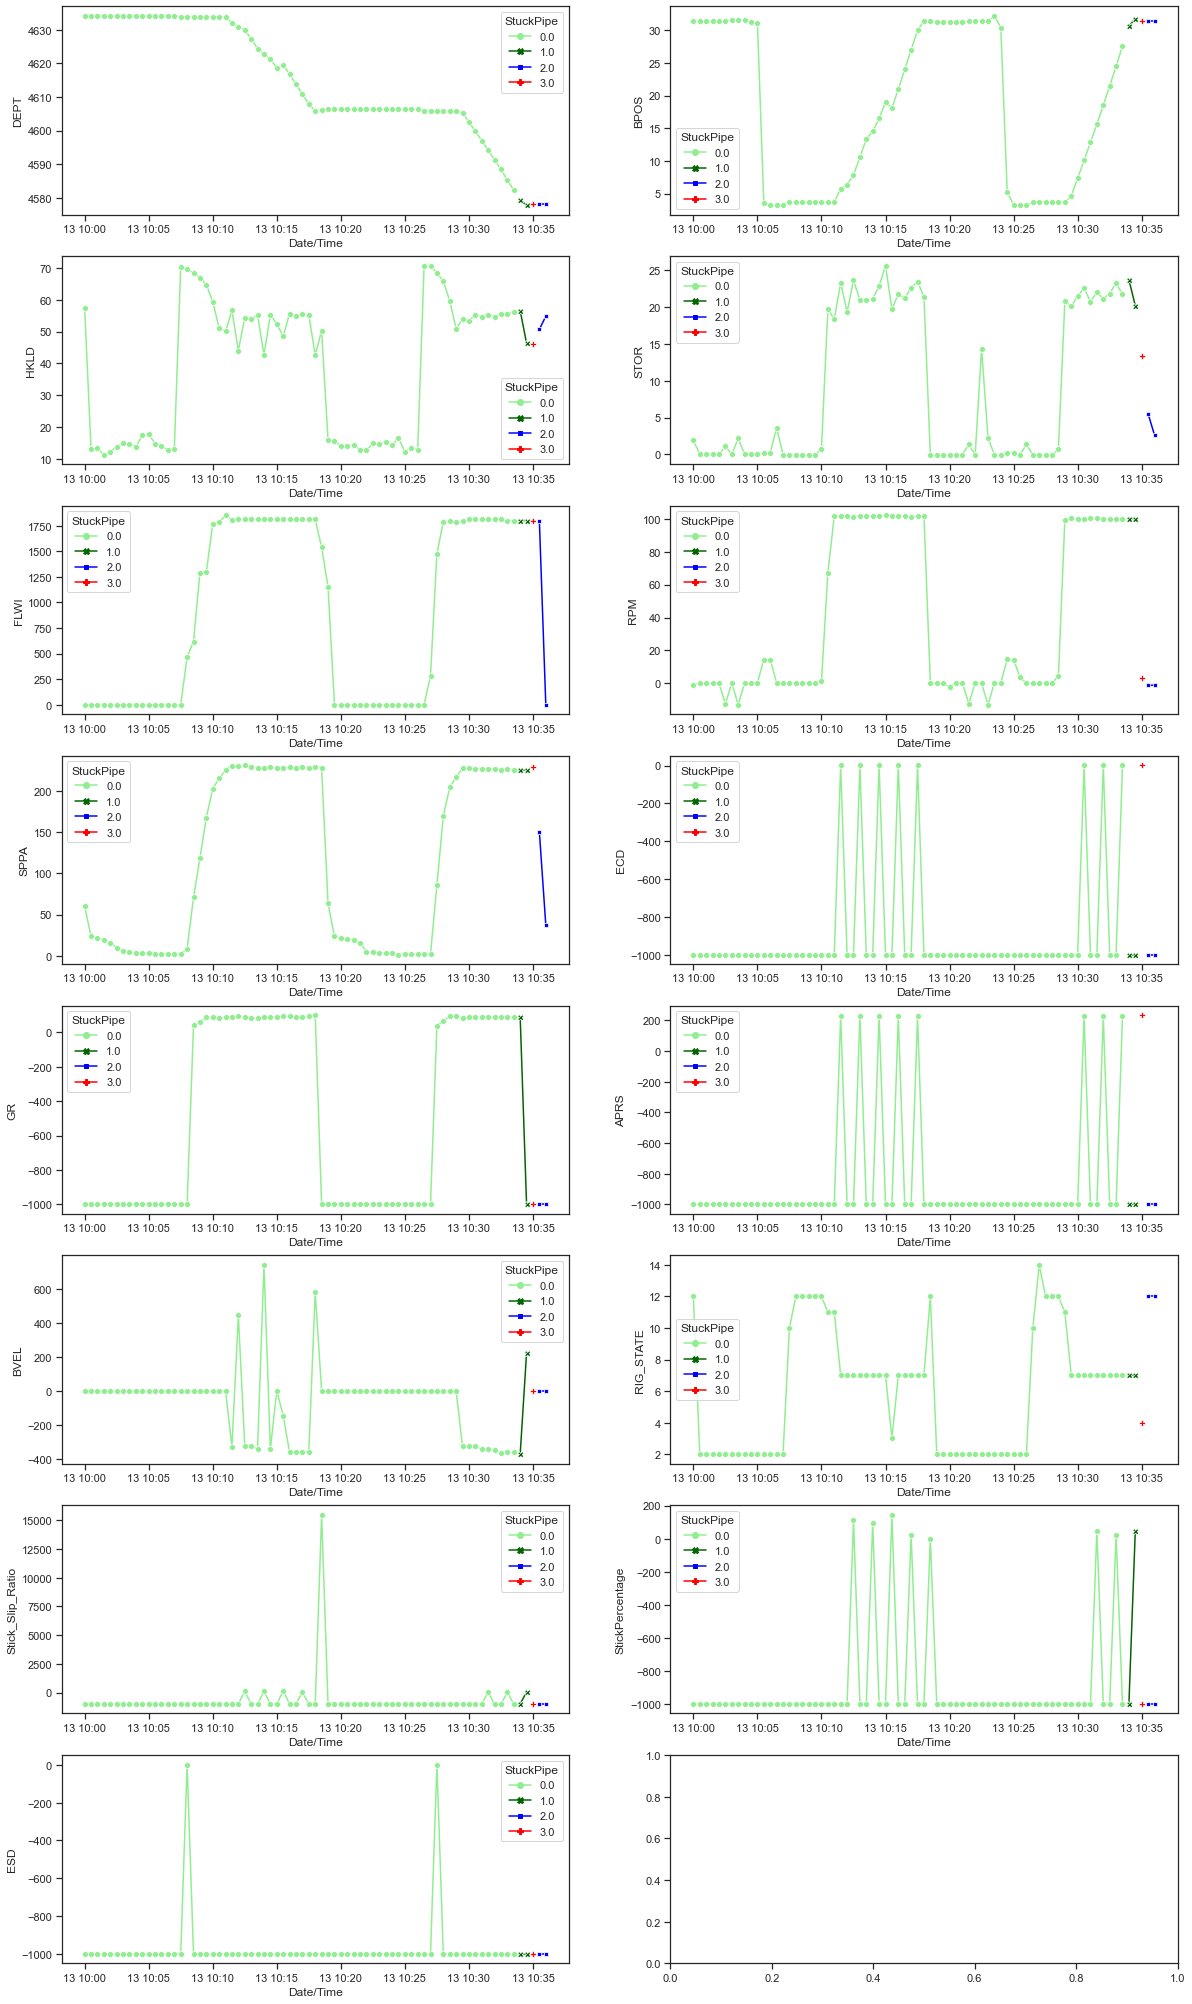

In [131]:
# Также посмотрим на линейные графики изменения по времени всех признаков с разделением на аварийность.
columns = 2
rows = math.ceil(df1.iloc[:,2:].shape[1]/columns)
fig, ax = plt.subplots(rows, columns, figsize=(20, 36))

i = 0
for col in df1.columns[2:]:
    sns.lineplot(x='Date/Time', y=col,
                 hue='StuckPipe', style='StuckPipe',
                 data=df1, markers=True, dashes=False,
                 palette=['lightgreen','darkgreen','blue','red'],
                 ax=ax[i // columns, i % columns])
    i += 1 

C:\Users\PHOBOS\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


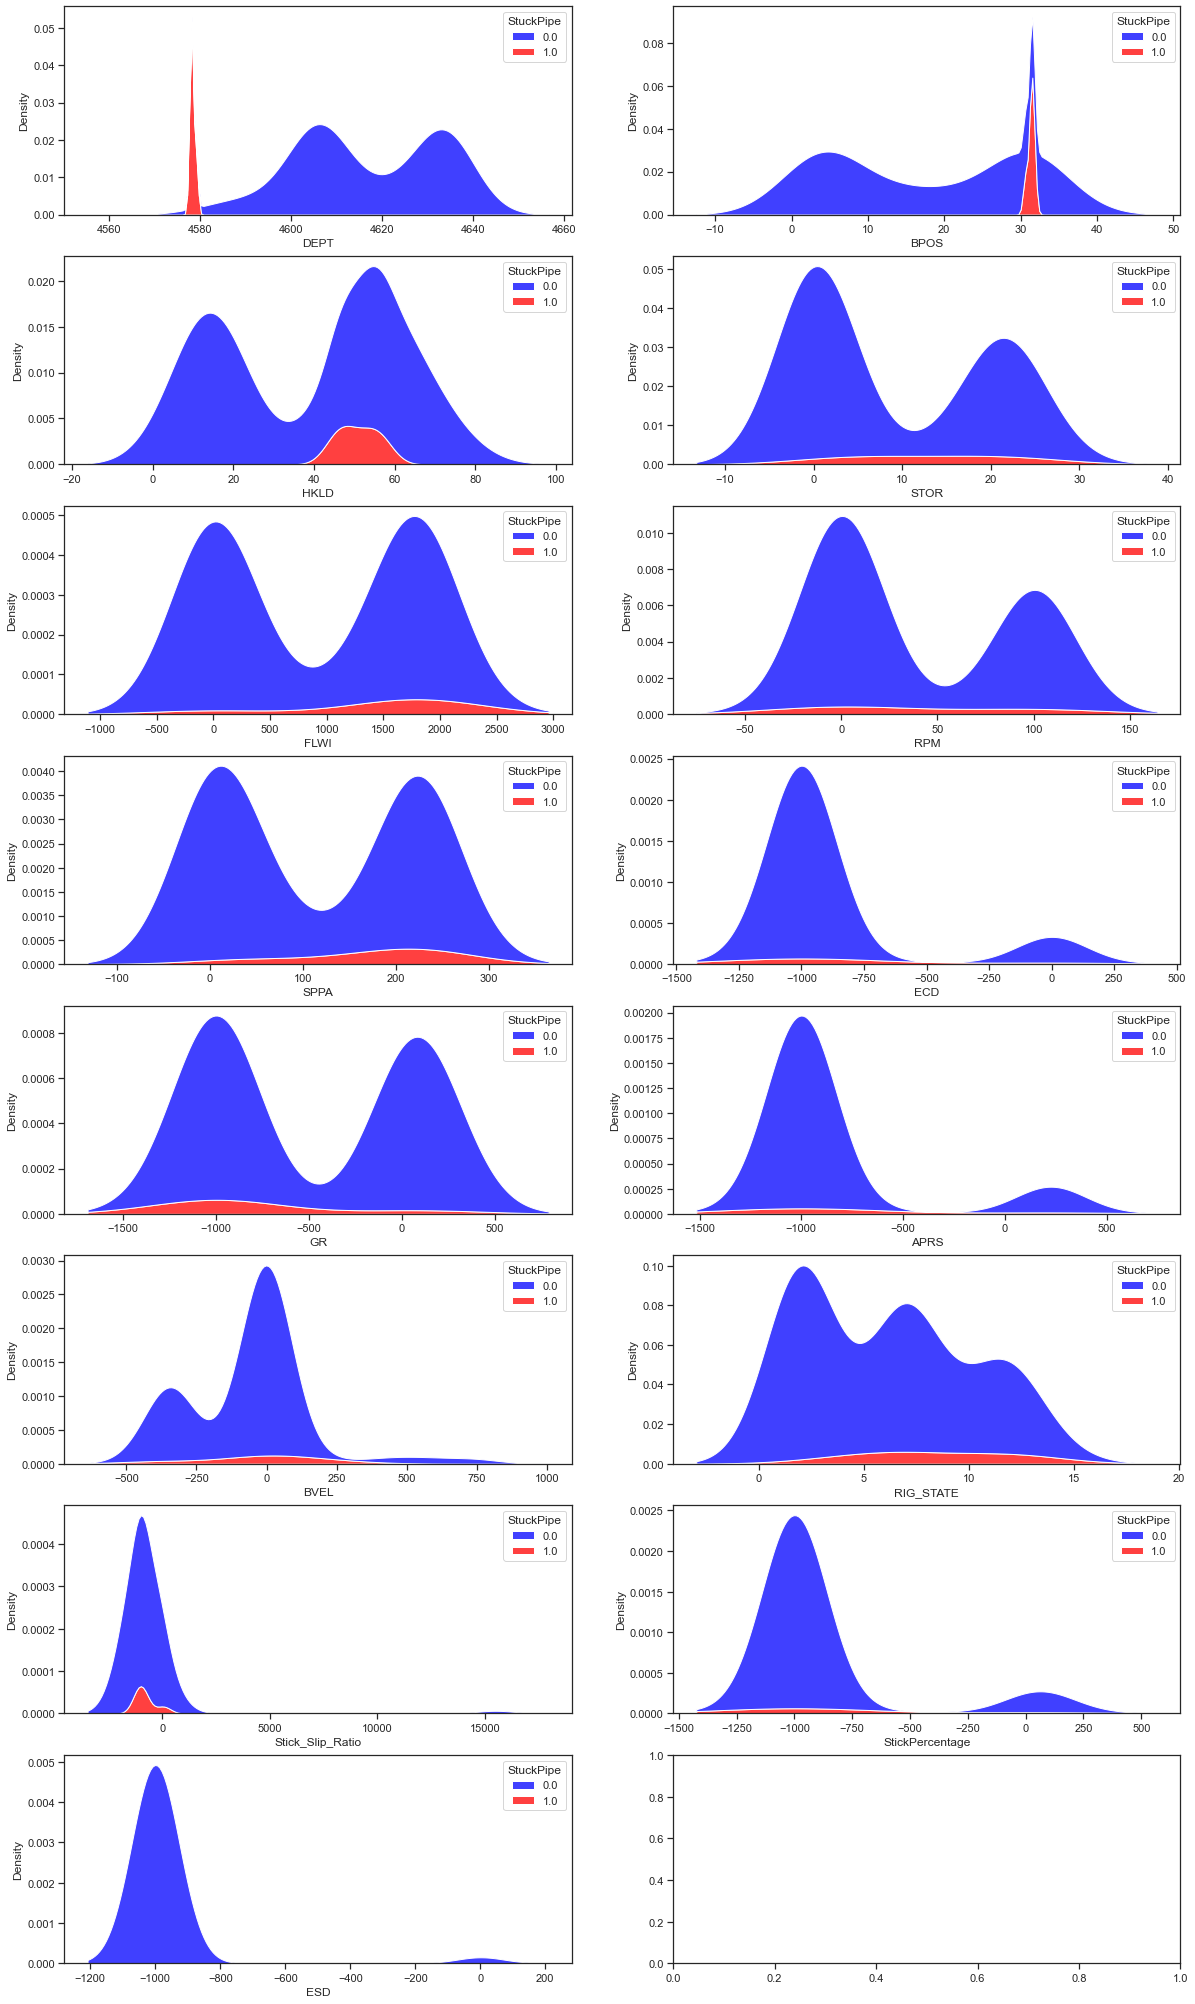

In [137]:
columns = 2
rows = math.ceil(df1.iloc[:,2:].shape[1]/columns)
fig, ax = plt.subplots(rows, columns, figsize=(20, 36))

tmpDf = df1
tmpDf.loc[tmpDf['StuckPipe']>=1,'StuckPipe'] = 1

i = 0
for col in df1.columns[2:]:
    sns.kdeplot(x=col,
                hue='StuckPipe',
                data=tmpDf, multiple="stack",
                palette=['blue','red'],
                ax=ax[i // columns, i % columns])
    i += 1 

Что вот можно сказать по подобным данным по каждому признаку в контексте зависимости от аварии:

DEPT - явная зависимость.

BPOS - возможная зависимость, есть что исследовать, например: посмотреть возникают ли аварии, когда данный признак достигает некоторых максимальных значений.

HKLD - возможная зависимость, это видно из линейного графика, т.к. данный параметр имеет некоторую линейность перед наступление аварии.

STOR, FLWI - аналогично BPOS.

RPM - скорее всего лишний признак, но лишь для типа аварии, который запечатлен в данном датасете, т.к. это похоже на кол-во оборотов врещения чего-то, т.е. больше похоже на следствие.

SPPA - аналогично BPOS.

ECD - не видно зависимости.

GR - аналогично BPOS, похоже что перед самой аварией этот показать сильно упал, т.е. в данном типе аварий этот параметр может быть ключевым.

APRS - не видно зависимости.

BVEL - аналогично HKLD.

RIG_STATE - есть что исследовать, например: "для данного типа аварий обычно в каком статусе находится вышка?".

STICK_SLIP_RATIO, STICKPERCENTAGE - не видно зависимости.

ESD - не видно зависимости.